# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [321]:
# Import your libraries:

import numpy as np
import pandas as pd

# Challenge 1 - Explore The Data

This lesson will explore the creation of a machine learning pipeline from beggining to end. We will save our model and use the model to make predictions on data outside of our training sample. Let's start by loading the dataset which can be obtained from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification) and [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom).

In [322]:
# Loading the data

mushrooms = pd.read_csv('../mushrooms.csv')

In [323]:
mushrooms[["class", "veil-type"]]

,class,veil-type
0,p,p
1,e,p
2,e,p
3,p,p
4,e,p
5,e,p
6,e,p
7,e,p
8,p,p
9,e,p


This dataset contains information about different types of mushrooms. Our response variable indicates whether a mushroom is poisonous. 

####  We will create a model to predict whether a mushroom is poisonous (the `class` column) using the information in all other columns.

Let's print the `head()` of this dataset to see what columns we have in our data.

In [324]:
# Your code here:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [325]:
mushrooms.shape

(8124, 23)

#### It looks like the columns in this dataset are coded. 

Let's examine the column types using `dtypes` to confirm this. 

In [326]:
# Your code here:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In this dataset, each column (feature) of the mushroom is represented by a single-character code. It would be best if we can obtain a dictionary of these codes so that we know what possible codes each column has and what each code represents. This dictionary can be obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom). In the table below, we print the code dictionary for you to reference.

| Features | Codes |
|---|---|
| classes | edible=e, poisonous=p |
| cap-shape | bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s |
| cap-surface | fibrous=f,grooves=g,scaly=y,smooth=s |
| cap-color | brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y |
| bruises | bruises=t,no=f |
| odor | almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s |
| gill-attachment | attached=a,descending=d,free=f,notched=n |
| gill-spacing | close=c,crowded=w,distant=d |
| gill-size | broad=b,narrow=n |
| gill-color | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y |
| stalk-shape | enlarging=e,tapering=t |
| stalk-root | bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? |
| stalk-surface-above-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-surface-below-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-color-above-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| stalk-color-below-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| veil-type | partial=p,universal=u |
| veil-color | brown=n,orange=o,white=w,yellow=y |
| ring-number | none=n,one=o,two=t |
| ring-type | cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z |
| spore-print-color | black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y |
| population | abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y |
| habitat | grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


**The columns in the mushrooms dataset seem to be correlated**. We suspect this because many columns seem to have dependencies. For example, if `ring-number` is `n` (none), `ring-type` must be `n` (none) too. Only when `ring-number` is `o` (one) or `t` (two) `ring-type` can be values other than `n`. Other columns may have inter-dependencies too but we can't tell right now. 

Why are we concerned about the variable correlations (also called *multicollinearity*)? It's because if they are strongly correlated, we shouldn't use the linear regression algorithm as the machine learning model. The prediction of the linear regression model is known to be unstable and inaccurate if the variables are strongly correlated. You can read more about why [here](https://en.wikipedia.org/wiki/Multicollinearity#Consequences_of_multicollinearity).

So far it's just our suspicion that the variables are strongly correlated. We need to verify that. Since all the columns are categorical, we cannot use a correlation matrix to examine the degrees of correlations. There are several ways to test whether categorical variables are correlated. The first way is to convert the categorical values to ordinal, then calcualte the correlation matrix with the numerical values. The second way is to use a [Chi-Square test of independence](https://onlinecourses.science.psu.edu/stat500/node/56/) to find out whether there is correlation between each pair of variables. We will use the second way in this lab. So read the explanation of Chi-Square test of independence to understand what it does.

We will begin with the first 2 variables (`cap-shape` and `cap-surface`). Our **null hypothesis of the Chi-Square test of independence is that the two variables are independent** and the **alternative hypothesis is that they are not independent**. To perform Chi-Squre test of independence, we first create a contingency table of those two features using Pandas' [`crosstab`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) function, then use Scipy's [`chi2_contingency`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) to test the variable independence from the contingency table.

#### In the following cell, create a contingency table of `cap-surface` and `cap-shape`. Assign this table to the variable `ct`.

In [327]:
# Your code here:
ct = pd.crosstab(mushrooms['cap-surface'], mushrooms['cap-shape'], dropna=False)
ct

cap-shape,b,c,f,k,s,x
cap-surface,,,,,,
f,52,0,1016,60,32,1160
g,1,1,1,1,0,0
s,244,0,820,418,0,1074
y,155,3,1315,349,0,1422


Let's import the chi quare test:

In [328]:
from scipy.stats import chi2_contingency

In the following cell perform the chi square test on the contingency table using the function you just imported. This function wil return a tuple with 4 values. The second value in the tuple is the p-value for our test. Print the p-value and interpret the result - is the null hypothesis rejected? 

In [329]:
# Your code here:
print('p-value:',chi2_contingency(ct)[1])

p-value: 4.635777687474967e-206


In [330]:
# Your comment here
    # null hypothesis = the two variables are independent 
    # the alternative hypothesis is that they are not independent.
 #En termes de valeur p, l'hypothèse nulle est généralement rejetée lorsque p ≤ 0,05. 
#ici p = 4.635777687474967e-206 ≤ 0,05 ==> l'H0 est rejetée, les variables ne sont pas indépendantes

## Now let's create a p-value matrix for all variables.

In the cell below, create a 2-dimensional matrix of all pairwise tests for each two features. Print the matrix and interpret the results.

Below is an example of what your matrix should look like:
![corr df](../corr_df.png)

*Hint: Use loop inside loop to perform pairwise tests for each two features.*

In [331]:
# Your code here:
list_total = []
for col in mushrooms:
    list_chi = []
    for c in mushrooms:
        list_temp=[]
        chi2 = chi2_contingency(pd.crosstab(mushrooms[col], mushrooms[c], dropna=False))
        list_temp.append(col)
        list_temp.append(c)
        list_temp.append(chi2[1])
        list_chi.append(list_temp)
        
    list_total.append(list_chi)   

df_mushrooms = pd.DataFrame(list_total,index = [col for col in mushrooms],columns = [col for col in mushrooms] )
for col in df_mushrooms:
    for ind in df_mushrooms.index:
        df_mushrooms[col][ind]=df_mushrooms[col][ind][2]

In [332]:
df_mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,0,1.19646e-103,5.51843e-68,6.05581e-78,0,0,5.50171e-31,5.02298e-216,0,0,...,0,0,0,1,3.32097e-41,4.23576e-82,0,0,0,0
cap-shape,1.19646e-103,0,4.63578e-206,1.24997e-220,1.81112e-112,0,3.13565e-40,1.87977e-10,5.16918e-209,0,...,1.9111e-56,0,2.92826e-221,1,1.66171e-252,2.33165e-132,1.793e-286,0,0,0
cap-surface,5.51843e-68,4.63578e-206,0,1.238e-243,1.35984e-31,5.62429e-278,5.75819e-78,3.83113e-201,3.4498e-135,0,...,9.62196e-145,0,0,1,3.8456e-89,6.79034e-32,3.97574e-256,1.0764e-263,0,0
cap-color,6.05581e-78,1.24997e-220,1.238e-243,0,2.34763e-77,0,7.29047e-102,3.85946e-274,0,0,...,0,0,0,1,6.12152e-100,0,0,0,0,0
bruises,0,1.81112e-112,1.35984e-31,2.34763e-77,0,0,8.03347e-35,4.13976e-160,5.66266e-243,0,...,0,0,0,1,2.12544e-31,1.19304e-09,0,0,2.21727e-156,0
odor,0,0,5.62429e-278,0,0,0,4.51896e-115,0,0,0,...,0,0,0,1,6.51433e-43,0,0,0,0,0
gill-attachment,5.50171e-31,3.13565e-40,5.75819e-78,7.29047e-102,8.03347e-35,4.51896e-115,0,2.1733e-10,1.89182e-22,0,...,3.3578e-27,0,0,1,0,5.57976e-74,3.12597e-109,0,4.61333e-299,0
gill-spacing,5.02298e-216,1.87977e-10,3.83113e-201,3.85946e-274,4.13976e-160,0,2.1733e-10,0,2.20687e-22,8.71765e-178,...,6.95901e-303,6.10041e-277,5.62218e-242,1,4.86741e-17,3.45875e-107,7.13089e-147,9.68767e-162,0,0
gill-size,0,5.16918e-209,3.4498e-135,0,5.66266e-243,0,1.89182e-22,2.20687e-22,0,0,...,7.22418e-40,1.04335e-229,4.66442e-206,1,1.00648e-22,8.5442e-68,0,0,0,0
gill-color,0,0,0,0,0,0,0,8.71765e-178,0,0,...,0,0,0,1,0,0,0,0,0,0


In [333]:
# Your comment here
    #les p-values sont très faible. Les variables ne sont pas indépendantes les unes des autres.

We verified the variables are highly correlated from the pairwise Chi-Square test of independence.

#### The next step in model generation is to ensure there is no missing data and handle any missing data if they exist.

In the next cell, check to see if there is any missing data in each column of the dataset

In [334]:
# Your code here:
"""# Check a class called Imputer in Scikit Learn with parameter "median"
from sklearn.impute import SimpleImputer

    #imputation par la moyenne
imp = SimpleImputer(missing_values=np.nan, strategy='median')
housing_train_df_imp = imp.fit_transform(housing_train_df)
housing_train_df= pd.DataFrame(housing_train_df_imp, columns=housing_train_df.columns)
housing_train_df.head()"""
missing_values = mushrooms.loc[mushrooms.isnull().any(axis=1) ==True]
missing_values

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [335]:
#Commentaire : Il n'y a pas de valeurs manquantes. Donc pas besoin de gerer cela avec la function SimpleImputer par exemple.

#### Since there is no work to be done to clean up missing data, the next step is to create dummy variables. 

Most machine learning algorithms cannot work with non-numeric data, so we will need to transform our data. Use the [`get_dummies` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform the data. Make sure to remove one dummy column per variable using the `drop_first=True` option.

In [336]:
# Your code here:
mushrooms= pd.get_dummies(mushrooms,drop_first=True )
mushrooms.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [337]:
mushrooms.columns

Index(['class_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-colo

In [338]:
mushrooms.shape

(8124, 96)

In [339]:
mushrooms.corr().class_p.sort_values(ascending=False)

class_p                       1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
spore-print-color_w           0.357384
habitat_p                     0.323346
odor_y                        0.286360
odor_s                        0.286360
stalk-color-above-ring_n      0.233164
stalk-color-below-ring_p      0.230277
stalk-color-above-ring_p      0.230277
stalk-color-below-ring_n      0.203966
odor_p                        0.186984
ring-number_o                 0.182101
cap-shape_k                   0.163565
odor_c                        0.161278
habitat_l                     0.155150
gill-color_h                  0.150694
veil-color_w                  0.140541
gill-attachment_f             0.129200
gill-color_g                  0.120285
cap-color_y              

In [340]:
mushrooms.class_p.value_counts()

0    4208
1    3916
Name: class_p, dtype: int64

#### Our final data exploration task is to prepare the data for modeling by splitting it to predictor, response, train and test. 

We will do this using the [`train_test_split` function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In the cell below, split the data to `X_train`, `X_test`, `y_train`, and `y_test` using this function. Select 80% of the data for the training sample and the rest for the test sample.

In [341]:
from sklearn.model_selection import train_test_split
x_columns = [col for col in mushrooms.columns.values if col != "class_p"]

X = mushrooms[x_columns]
y = mushrooms.class_p

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)


# Challenge 2 - Creating and Saving Our Model

Determining whether a mushroom is poisonous is a classification task. There are multiple classification models we can choose from.
However, since we have determined that there are many columns that are not indepdendent, this limits our choice of model. One model we will not consider is logistic regression. Two potential choices for this modeling task are [random forest](https://en.wikipedia.org/wiki/Random_forest) and [SVM](https://en.wikipedia.org/wiki/Support_vector_machine).

Let's start with Random Forest. We think of random forest as a voting algorithm. We generate many decision trees by sampling both rows and columns in our dataset. Each one of these trees produces a decision. We let all the trees "vote" and the aggregate decision that they produce gives us the final decision for our algorithm (in this case, they will vote whether each mushroom is poisonous or edible). To learn more about random forests, click [here](https://onlinecourses.science.psu.edu/stat857/node/179/).

In the cell below, we will import and initialize a random forest from scikit-learn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). Assign the initialized model to `mushroom_rf`. For now, we will just use the default settings for the random forest classifier, so there is no need to pass any arguments to the function.

In [342]:
from sklearn.ensemble import RandomForestClassifier

# Your code here:

# instantiate learning model
mushroom_rf = RandomForestClassifier()


In the cell below, fit the model to the training data.

In [343]:
# Your code here:

# fitting the model
mushroom_rf.fit(X_train, y_train)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Next, let's evaluate the model. One of the most straightforward ways to evaluate a classification model is using a confusion matrix. 

The confusion matrix shows us the true positives, false positives, false negatives and true negatives in the data. Our goal is to maximize the true positives and true negatives (the observations that are correctly classified) and minimize the false positives and false negatives.

In the cell below, we'll start by generating predictions for the test data using the `predict` function. 

In [344]:
# Your code here:

# predict the response
y_test_predict = mushroom_rf.predict(X_test)

Now we'll import the `confusion_matrix` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)) and compute the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) by comparing the observed data (`y_test`) and the predicted data that you found in the cell above.

In [345]:
from sklearn import metrics

from sklearn.metrics import confusion_matrix

# Your code here:

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_predict)
    
print('\nconfusion_matrix:\n', cm)


confusion_matrix:
 [[827   0]
 [  0 798]]


In [346]:
y_test = y_test.astype(float)
y_test_predict = y_test_predict.astype(float)

In [347]:
#y_test_mat = y_test.as_matrix()

In [348]:
from sklearn import metrics

metrics.roc_auc_score(y_test, pd.Series(y_test_predict))
#metrics.auc(fpr, tpr)

1.0

In [349]:
a.value_counts()

True    1625
Name: class_p, dtype: int64

In [350]:
type(y_test_predict)

numpy.ndarray

In [351]:
tpr

array([nan, nan, nan])

# Bonus Challenge 1 - Use a Different ML Algorithm to Evaluate Model

Repeat the steps here to predict and evaluate the model but instead use gradient boosted classification. Your end result should be a confusion matrix comparing the predicted and observed y values for the test sample. You can read more about gradient boosting [here](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/).

To calculate the gradient boosted classfication, use the [`GradientBoostingClassifier` of Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [352]:
from sklearn.ensemble import GradientBoostingClassifier

# Your code here:

# instantiate learning model
mushroom_gb = RandomForestClassifier()

# fitting the model
mushroom_gb.fit(X_train, y_train)

# predict the response
y_test_predict_gb = mushroom_gb.predict(X_test)

# Compute confusion matrix
cm_gb = metrics.confusion_matrix(y_test, y_test_predict_gb)
    
print('\nconfusion_matrix:\n', cm)


confusion_matrix:
 [[827   0]
 [  0 798]]


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [354]:
# faire test un set de DEV 
#dev = 

# Challenge 3 - Producing Individual Predictions and Saving The Model

One of the most important goals of machine learning models is to act as something like a prediction black box. We would like to pass an observation to the model and get back a prediction as an output. Let's do this in the next cells using the `predict` function. What we want to do is to pick a random mushroom and generate a prediction that will tell us whether it is poisonous.

#### In the next cell, create a function called `get_random_data` that accepts a dataset and returns a random row from the dataset.

In [355]:
from random import seed
from random import randint

def get_random_data(dataset):
    """
    Returns a random row of a dataset
    
    Args:
        dataset [dataframe]: a Pandas dataframe containing a dataset
    
    Returns:
        A random row in the dataset
    """
    # Your code here
    seed()
    row = randint(0,len(dataset))

    return row

#### Call `get_random_data` to obtain a random row from the test dataset. Assign the returned row to `random_mushroom` and print.

In [356]:
# Your code here
#random_mushroom = mushrooms.iloc[get_random_data(mushrooms)]
random_mushroom=get_random_data(mushrooms)
random_mushroom

6332

In [357]:
X_random_mushroom = pd.DataFrame(X.iloc[random_mushroom]).T
X_random_mushroom

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6332,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


#### In the cell below, use the `predict` function to generate a prediction for this random mushroom. Is the random mushroom poisonous? Compare this to the true y value.

In [358]:
# Your code here:
y_test_predict_gb = mushroom_gb.predict(X_random_mushroom)
print('\nPrediction:',y_test_predict_gb,'\nTrue y:',y.iloc[random_mushroom])


Prediction: [1] 
True y: 1


In [359]:
# Your comment here
    #Le modèle semble bien fonctionner.

#### Our final step is to save our model. 

Do this in the cell below using [pickling](https://docs.python.org/3/library/pickle.html). Import the pickle library and save the `mushroom_rf` model as a pickle file using `pickle.dump()`. Name your file `mushrooms.sav`

In [360]:
import pickle

# Your code here:
pickle.dump(mushroom_rf, open('mushroom_rf', 'wb'))

## Bonus Challenge 2 - Heatmap to Visualize Data Correlation

Practice generating a heatmap to visualize the pairwise column correlations. You can do one of the following two things (or both if you like):

* Create a heatmap using the p-value matrix for the pairwise Chi-Square test of independence. 

* Use Scikit-Learn's `LabelEncoder` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) to transform the raw categorical variables to ordinal. Then calculate the correlation matrix using the ordinal values.

If you're scratching your hairs off, refer to [this example for the first way](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) and [this example for the second way](https://www.kaggle.com/haimfeld87/analysis-and-classification-of-mushrooms). 

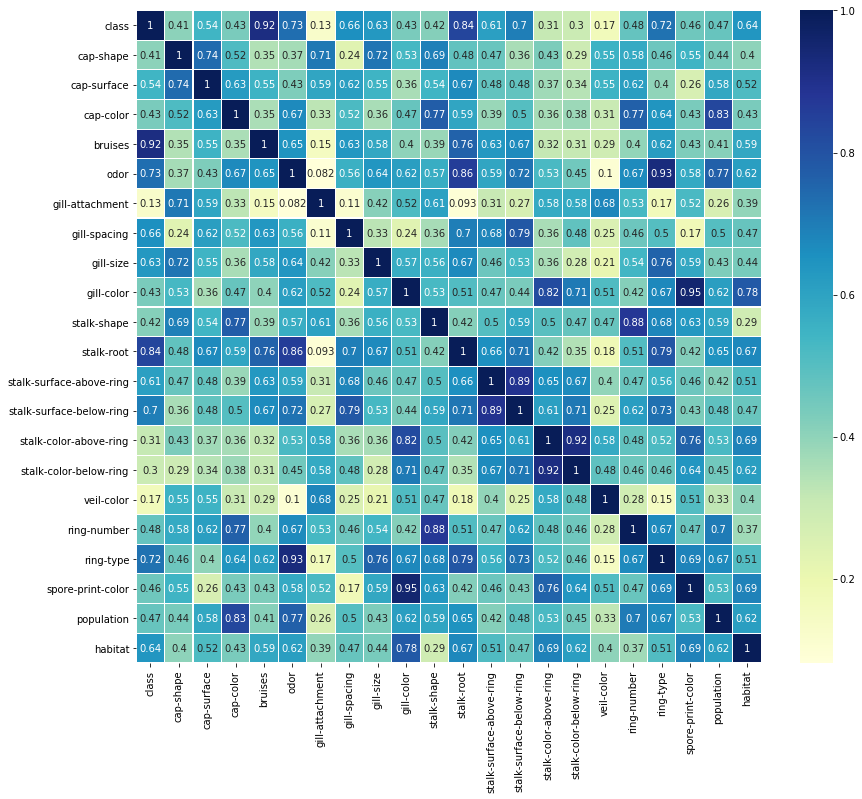

In [361]:
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df_mushrooms.columns:
    df_mushrooms[column] = labelencoder.fit_transform(df_mushrooms[column])

df_mushrooms=df_mushrooms.drop(["veil-type"],axis=1)

plt.figure(figsize=(14,12))
sns.heatmap(df_mushrooms.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

